<a href="https://colab.research.google.com/github/zhenglinchen1096496/DBU-Python/blob/main/AI_HW_4_Vectorized_Linear_Regression_ZhengLinChen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Program Parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Generate Data

In [2]:
# Generate random data for demonstration
TRUE_SLOPE = 1.75
TRUE_INTERCEPT = 1
RAND_SCALE = 0.1
RAND_SEED = 0
np.random.seed(RAND_SEED)
X = np.random.rand(100, 1)  # Feature (input)
#sort so graphs come out better
y = TRUE_SLOPE * X + TRUE_INTERCEPT + RAND_SCALE * np.random.randn(100, 1)  # Target variable (output) with some noise


In [3]:
# Split the data into training (80%) and testing (20%) sets
TEST_SIZE_PERCENT = 0.2
test_start_index = int((1-TEST_SIZE_PERCENT) * len(X)) #from 80% index to 100% index (20% total) for testing
X_train = X[:test_start_index]
X_test = X[test_start_index:]
y_train = y[:test_start_index]
y_test = y[test_start_index:]


In [4]:
# Normalization
def z_score_normalize_features(X_train, X_test):

    mean_X = np.mean(X_train, axis=0)
    std_X = np.std(X_train, axis=0)

    # mean_y = np.mean(y_train)
    # std_y = np.std(y_train)

    X_normalized_train = (X_train - mean_X) / std_X
    X_normalized_test = (X_test - mean_X) / std_X

    # y_normalized_train = (y_train - mean_y) / std_y
    # y_normalized_test = (y_test - mean_y) / std_y

    return X_normalized_train, X_normalized_test, mean_X, std_X,


In [5]:
X_train, X_test, mean_X, std_X = z_score_normalize_features(X_train, X_test)

#EDA

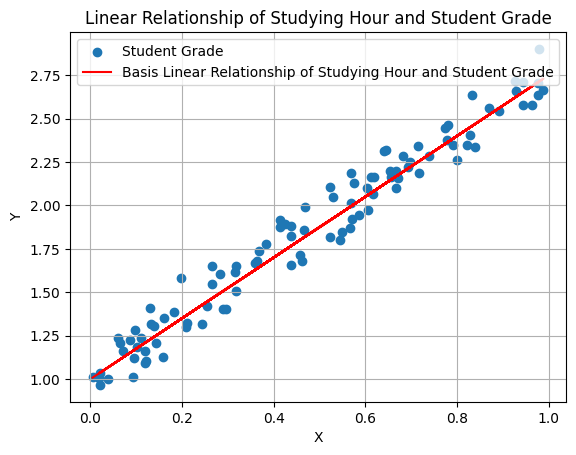

In [6]:
# Plot the data points
plt.scatter(X, y, label='Student Grade')

# Plot the basis linear relationship
y_line = TRUE_SLOPE * X + TRUE_INTERCEPT
plt.plot( X, y_line, color='red',
         #linewidth=1,
         label='Basis Linear Relationship of Studying Hour and Student Grade')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Relationship of Studying Hour and Student Grade')
plt.grid(True)
plt.show()

#Linear Regression not vectorized

In [7]:
def linear_regression_nonvectorized_1D(x, y, learning_rate, epochs, early_stop = True, cost_improvement_threshold = 1e-5):

    # INITIALIZE VARIABLES
    # Initialize the coefficients (weights) with zeros
    w = 0.0  # w (slope)
    b = 0.0  # b (intercept)
    # Initialize with a large value
    prev_cost = float('inf')
    # Create list to store cost values throughout training for plotting
    cost_history = []

    # Get the number of samples m
    m = len(x)

    # Perform gradient descent EPOCH times to find the optimal w & b
    for epoch in range(epochs):
        dw = 0.0    # Initialize dJ/dw for this epoch
        db = 0.0    # Initialize dJ/db for this epoch
        cost = 0.0  # Initialize cost for this epoch

        # Sum gradients, dJ/dw and dJ/db, and costs over number of samples
        for i in range(m):
            # Compute loss or error for data point i
            error = w*x[i] + b - y[i]
            # Add the cost for data point i to the total
            cost += error**2
            # Compute gradients for w & b at point i
            dw += x[i] * error # dJ/dw
            db += error # dJ/db

        # Divide respective sums by number of samples
        dw /= m  # dw = dw / m
        db /= m  # db = db / m
        cost /= (2*m)  # cost = cost / (2*m)

        # Update w & b for next epoch
        w -= learning_rate * dw  # w = w - LEARNING_RATE*dw
        b -= learning_rate * db  # b = b - LEARNING_RATE*db

        # Append the cost to the history
        cost_history.append(cost)

        # Check for early stopping based on cost improvement
        if early_stop:
            if prev_cost - cost < cost_improvement_threshold:
              break
        prev_cost = cost

    return w, b, cost_history


In [8]:
# Define the learning rate and the number of epochs
LEARNING_RATE = 0.001
EPOCHS = 5000
EARLY_STOP = True
COST_IMPROVEMENT_THRESHOLD = 1e-5


# Start measuring training time
start_time = time.time()

w, b, cost_history = linear_regression_nonvectorized_1D(X_train, y_train, learning_rate = LEARNING_RATE,
                                                        epochs = EPOCHS, early_stop = EARLY_STOP, cost_improvement_threshold = COST_IMPROVEMENT_THRESHOLD)

# Stop measuring training time
end_time = time.time()
training_time_no_vec = end_time - start_time

In [9]:
print(w)
print(b)

[0.47914229]
[1.78251058]


In [10]:
# Make predictions using the trained model

# y_pred = w*X_test + b
y_pred = np.dot(X_test,w) + b

# Graphs and Performance

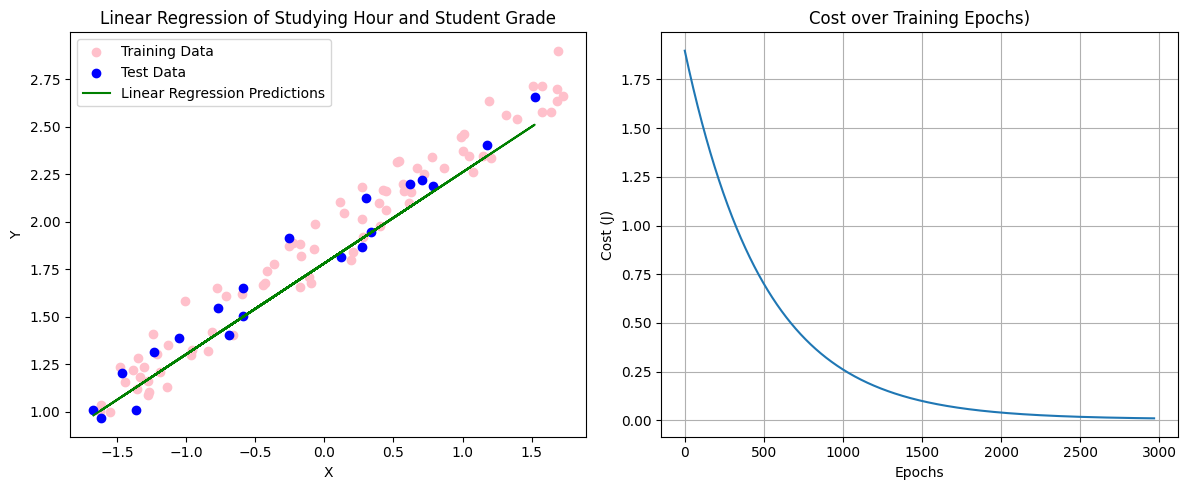

Random Basis Slope (m): 1.75          Model Slope (w): [0.47914229]
Random Basis Intercept (b): 1      Model Intercept (b): [1.78251058]
Training Time Non Vectorized: 8.56 seconds
Training Epochs: 2969
Mean Squared Error Non Vectorized: 0.013176551065069783
R-squared (R^2) Score Non Vectorized: 0.9430664229055036


In [11]:
# Plot the original data and the linear regression line
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='pink', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='green', label='Linear Regression Predictions')
#plt.plot(x_train, basis_y, color='red', linewidth=1, label='Basis Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression of Studying Hour and Student Grade')

# Plot the cost over epochs
plt.subplot(1, 2, 2)
plt.plot(range(len(cost_history)), cost_history)
# epochs_to_plot = 11
# plt.plot(range(epochs_to_plot), cost_history[:epochs_to_plot])
plt.xlabel('Epochs')
plt.ylabel('Cost (J)')
plt.title('Cost over Training Epochs)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Print training outcomes
#print("Final cost:", cost_history[-1])
print("Random Basis Slope (m):", TRUE_SLOPE, "         Model Slope (w):", w)
print("Random Basis Intercept (b):", TRUE_INTERCEPT, "     Model Intercept (b):", b)
print(f"Training Time Non Vectorized: {training_time_no_vec:.2f} seconds")
print("Training Epochs:", len(cost_history))

# Calculate Mean Squared Error (MSE)
mse_non_vec = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Non Vectorized:", mse_non_vec)

# Calculate the R-squared (R^2) score
r2_non_vec = r2_score(y_test, y_pred)
print("R-squared (R^2) Score Non Vectorized:", r2_non_vec)


# Linear Regression vectorized

In [12]:
def linear_regression_vectorized_1D(x, y, learning_rate, epochs, early_stop=True, cost_improvement_threshold = 1e-5):

    # INITIALIZE VARIABLES
    # Initialize the coefficients (weights) with zeros
    m, n = x.shape
    w = np.zeros(n)
    b = 0.0  # b (intercept)
    # Initialize with a large value
    prev_cost = float('inf')
    # Create list to store cost values throughout training for plotting
    cost_history = []

    # Get the number of samples m
    m = len(x)

    # Perform gradient descent EPOCH times to find the optimal w & b
    for epoch in range(epochs):

      # Vectorized implementation of the predicted values for training set
        y_pred = np.dot(x, w) + b

        # Compute errors and cost for training set using vectorized operations
        # if epoch==1: print('y_pred =', y.shape, ' y_train =', y_train.shape)
        errors = y_pred - y
        cost = np.sum(errors**2) / (2 * m)

        # Compute gradients for training set using vectorized operations
        # if epoch==1: print('X.T =', X_train.T.shape, ' errors =', errors.shape)
        dw = np.dot(x.T, errors) / m
        db = np.sum(errors) / m

        # Update w & b for the next epoch for training set
        # if epoch==1: print('w =', w.shape,' dw =', dw.shape, ' learning rate =', learning_rate)
        w -= learning_rate * dw
        b -= learning_rate * db

        # Append the cost to the history
        cost_history.append(cost)

        # Check for early stopping based on cost improvement
        if early_stop:
            if prev_cost - cost < cost_improvement_threshold:
              break
        prev_cost = cost

    return w, b, cost_history


In [13]:
# Define the learning rate and the number of epochs
LEARNING_RATE = 0.001
EPOCHS = 5000
EARLY_STOP = True
COST_IMPROVEMENT_THRESHOLD = 1e-5


# Start measuring training time
start_time = time.time()

w, b, cost_history = linear_regression_nonvectorized_1D(X_train, y_train, learning_rate = LEARNING_RATE,
                                                        epochs = EPOCHS, early_stop = EARLY_STOP, cost_improvement_threshold = COST_IMPROVEMENT_THRESHOLD)

# Stop measuring training time
end_time = time.time()
training_time_vec = end_time - start_time

In [14]:
print(w)
print(b)

[0.47914229]
[1.78251058]


In [15]:
# Make predictions using the trained model
# y_pred = w*X_test + b
y_pred = np.dot(X_test,w) + b

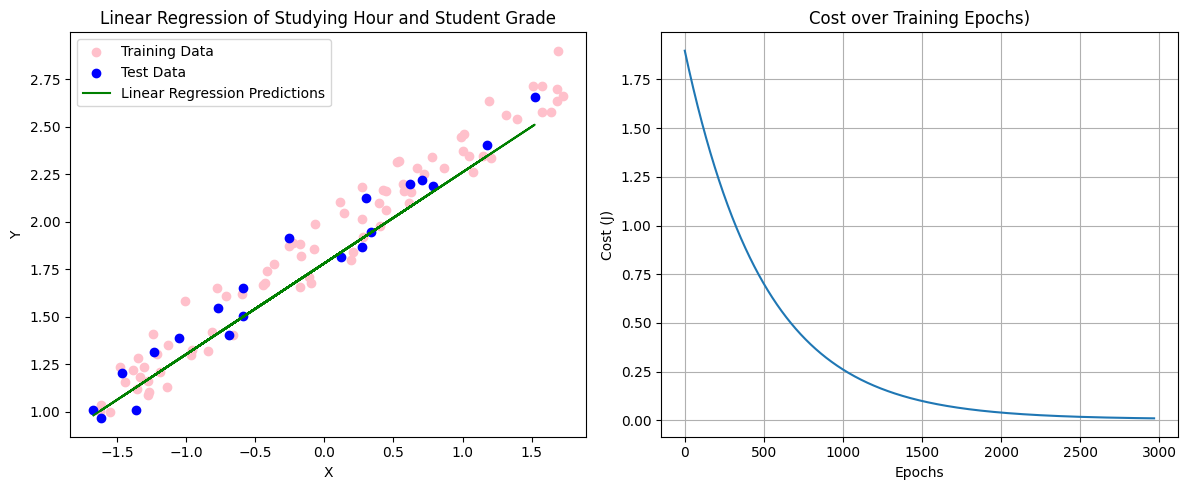

Random Basis Slope (m): 1.75          Model Slope (w): [0.47914229]
Random Basis Intercept (b): 1      Model Intercept (b): [1.78251058]
Training Time Vectorized: 4.05 seconds
Training Epochs: 2969
Mean Squared Error Vectorized: 0.013176551065069783
R-squared (R^2) Score Vectorized: 0.9430664229055036


In [16]:
# Plot the original data and the linear regression line
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='pink', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='green', label='Linear Regression Predictions')
#plt.plot(x_train, basis_y, color='red', linewidth=1, label='Basis Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression of Studying Hour and Student Grade')

# Plot the cost over epochs
plt.subplot(1, 2, 2)
plt.plot(range(len(cost_history)), cost_history)
# epochs_to_plot = 11
# plt.plot(range(epochs_to_plot), cost_history[:epochs_to_plot])
plt.xlabel('Epochs')
plt.ylabel('Cost (J)')
plt.title('Cost over Training Epochs)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Print training outcomes
#print("Final cost:", cost_history[-1])
print("Random Basis Slope (m):", TRUE_SLOPE, "         Model Slope (w):", w)
print("Random Basis Intercept (b):", TRUE_INTERCEPT, "     Model Intercept (b):", b)
print(f"Training Time Vectorized: {training_time_vec:.2f} seconds")
print("Training Epochs:", len(cost_history))

# Calculate Mean Squared Error (MSE)
mse_vec = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Vectorized:", mse_vec)

# Calculate the R-squared (R^2) score
r2_vec = r2_score(y_test, y_pred)
print("R-squared (R^2) Score Vectorized:", r2_vec)

In [17]:
print(f"Mean Squared Error Non Vectorized: {mse_non_vec:.6f}")
print(f"Mean Squared Error Vectorized: {mse_vec:.6f}")

print(f"\nR-squared (R^2) Score Non Vectorized: {r2_non_vec:.6f}")
print(f"R-squared (R^2) Score Vectorized: {r2_vec:.6f}")

print(f"\nTraining Time Non Vectorized: {training_time_no_vec:.6f} seconds")
print(f"Training Time Vectorized: {training_time_vec:.6f} seconds")
# print(f"Training Time SciKitLearn: {training_time_scikitlearn:.6f} seconds")

print(f"\nVectorized version is {training_time_no_vec/training_time_vec:.6f} times faster!")
training_min = 1
print(f"Meaning that {training_min} minute of vectorized training is equivalent to {training_time_no_vec/training_time_vec*training_min:.0f} minutes of non vectorized training!")

Mean Squared Error Non Vectorized: 0.013177
Mean Squared Error Vectorized: 0.013177

R-squared (R^2) Score Non Vectorized: 0.943066
R-squared (R^2) Score Vectorized: 0.943066

Training Time Non Vectorized: 8.558807 seconds
Training Time Vectorized: 4.048350 seconds

Vectorized version is 2.114147 times faster!
Meaning that 1 minute of vectorized training is equivalent to 2 minutes of non vectorized training!


# Report

1.Vectorized models are faster than non-vectorized models.In this model,the training time is only half that of the non-vectorized model.

This is because vectorization takes advantage of the parallel processing power of modern cpus and Gpus. Non-vectorized models often use explicit loops (such as for loops) to process data elements one by one, resulting in inefficiencies.

In an interpreted language like Python, loops incur a lot of interpreter overhead. Vectorization operations are often implemented in compiled libraries such as NumPy, reducing this overhead.

2.Vectorized code is generally more concise and easier to read and maintain. As it uses fewer codes or loop. While, non-vectorized code can be more verbose and error-prone.

3.With normalization, the w I got deviates further from the original w(1.75). Because the data is more centralized after standardization.

4.If the value of COST_IMPROVEMENT_THRESHOLD is too large, for example, when it reaches e-3, the model will stop training in advance. To allow the model to get enough training times, it is better to set COST_IMPROVEMENT_THRESHOLD to 1e-5.